In [2]:
import os
from glob import glob

import numpy as np

import tensorflow as tf
from PIL import Image # 주로 image 열 때

import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
os.listdir('dataset/mnist_png/training/0') # 현재 경로에 어떤 파일/폴더가 있는지 return

['1.png',
 '1000.png',
 '10005.png',
 '10010.png',
 '10022.png',
 '10025.png',
 '10026.png',
 '10045.png',
 '10069.png',
 '10071.png',
 '10080.png',
 '10083.png',
 '10107.png',
 '10119.png',
 '10120.png',
 '10121.png',
 '10128.png',
 '10140.png',
 '1015.png',
 '10167.png',
 '10168.png',
 '10176.png',
 '1018.png',
 '10188.png',
 '10195.png',
 '10203.png',
 '10204.png',
 '10221.png',
 '10230.png',
 '10237.png',
 '10240.png',
 '10242.png',
 '10245.png',
 '10254.png',
 '10259.png',
 '10261.png',
 '10265.png',
 '10272.png',
 '10276.png',
 '1028.png',
 '10283.png',
 '1029.png',
 '10323.png',
 '10326.png',
 '10334.png',
 '10340.png',
 '10343.png',
 '10348.png',
 '10352.png',
 '10363.png',
 '10366.png',
 '10372.png',
 '10380.png',
 '10384.png',
 '1040.png',
 '10407.png',
 '10425.png',
 '10439.png',
 '10456.png',
 '1046.png',
 '10469.png',
 '10471.png',
 '10479.png',
 '10488.png',
 '1049.png',
 '10505.png',
 '10523.png',
 '10530.png',
 '10531.png',
 '10542.png',
 '10563.png',
 '10564.png',
 '10

In [10]:
glob('dataset/mnist_png/training/0/*.png')
# os.listdir은 해당 경로에 있는 파일 목록들만 가져왔다면
# glob는 앞의 경로까지 다 가지고 와줌
# *.png -> png가 포함된 파일들만 가져와짐
# ex) training/*/*.png -> 0뿐만 아니라 0~9까지 모든 폴더별로 .png 파일 가져와짐

['dataset/mnist_png/training/0\\1.png',
 'dataset/mnist_png/training/0\\1000.png',
 'dataset/mnist_png/training/0\\10005.png',
 'dataset/mnist_png/training/0\\10010.png',
 'dataset/mnist_png/training/0\\10022.png',
 'dataset/mnist_png/training/0\\10025.png',
 'dataset/mnist_png/training/0\\10026.png',
 'dataset/mnist_png/training/0\\10045.png',
 'dataset/mnist_png/training/0\\10069.png',
 'dataset/mnist_png/training/0\\10071.png',
 'dataset/mnist_png/training/0\\10080.png',
 'dataset/mnist_png/training/0\\10083.png',
 'dataset/mnist_png/training/0\\10107.png',
 'dataset/mnist_png/training/0\\10119.png',
 'dataset/mnist_png/training/0\\10120.png',
 'dataset/mnist_png/training/0\\10121.png',
 'dataset/mnist_png/training/0\\10128.png',
 'dataset/mnist_png/training/0\\10140.png',
 'dataset/mnist_png/training/0\\1015.png',
 'dataset/mnist_png/training/0\\10167.png',
 'dataset/mnist_png/training/0\\10168.png',
 'dataset/mnist_png/training/0\\10176.png',
 'dataset/mnist_png/training/0\\1018.p

In [12]:
data_paths = glob('dataset/mnist_png/training/*/*.png')
len(data_paths)

60000

In [14]:
data_paths[0]

'dataset/mnist_png/training\\0\\1.png'

In [15]:
path = data_paths[0]
path

'dataset/mnist_png/training\\0\\1.png'

# 데이터 분석 (MNIST)

In [16]:
os.listdir('dataset/mnist_png/training/')

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [17]:
len(os.listdir('dataset/mnist_png/training/'))

10

In [18]:
label_nums = os.listdir('dataset/mnist_png/training/')

In [19]:
len(label_nums)

10

### 데이터 별 갯수 비교

In [20]:
nums_dataset = []

for lbl_n in label_nums:
    # 경로에 있는 각 폴더별(lable별)로 데이터 개수
    data_per_class = os.listdir('dataset/mnist_png/training/' + lbl_n) 
    nums_dataset.append(len(data_per_class))

In [23]:
label_nums

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [22]:
nums_dataset

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]

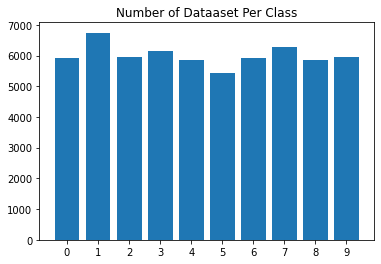

In [25]:
plt.bar(label_nums, nums_dataset)
plt.title('Number of Dataaset Per Class')
plt.show()

# Pillow로 열기

In [29]:
path

'dataset/mnist_png/training\\0\\1.png'

In [30]:
image_pil = Image.open(path)
image = np.array(image_pil)

In [31]:
image.shape

(28, 28)

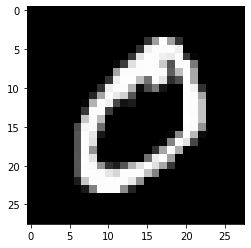

In [32]:
plt.imshow(image, 'gray')
plt.show()

# TensorFlow로 열기

In [34]:
gfile = tf.io.read_file(path)
image = tf.io.decode_image(gfile)

In [35]:
image.shape

TensorShape([28, 28, 1])

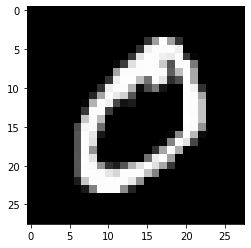

In [36]:
# Tensorflow로 열 경우 이미지 shape에 channel까지 명시되어있음
# 시각화해서 이미지 보기위해선 차원 수 줄여줘야해 (PIL과 차이점!)
plt.imshow(image[:,:,0], 'gray')
plt.show()

# Label 얻기

In [37]:
path

'dataset/mnist_png/training\\0\\1.png'

In [40]:
label = path.split('\\')[-2] # 마지막에서 2번째
label

'0'

In [41]:
type(label)

str

In [42]:
int(label)

0

In [43]:
# 위 과정 함수화

def get_label(path):
    class_name = path.split('\\')[-2]
    label = int(class_name)
    return label

In [44]:
path, get_label(path)

('dataset/mnist_png/training\\0\\1.png', 0)

# 데이터 이미지 사이즈 알기

In [52]:
from tqdm.notebook import tqdm

In [54]:
heights = []
widths = []

In [55]:
data_paths[:10]

['dataset/mnist_png/training\\0\\1.png',
 'dataset/mnist_png/training\\0\\1000.png',
 'dataset/mnist_png/training\\0\\10005.png',
 'dataset/mnist_png/training\\0\\10010.png',
 'dataset/mnist_png/training\\0\\10022.png',
 'dataset/mnist_png/training\\0\\10025.png',
 'dataset/mnist_png/training\\0\\10026.png',
 'dataset/mnist_png/training\\0\\10045.png',
 'dataset/mnist_png/training\\0\\10069.png',
 'dataset/mnist_png/training\\0\\10071.png']

In [56]:
len(data_paths)

60000

In [57]:
# 6만개 하나하나 불러와 이미지 shape 확인
for path in tqdm(data_paths):
    img_pil = Image.open(path)
    image = np.array(img_pil)
    h, w = image.shape
    
    heights.append(h)
    widths.append(w)

In [58]:
np.unique(heights), np.unique(widths)

(array([28]), array([28]))

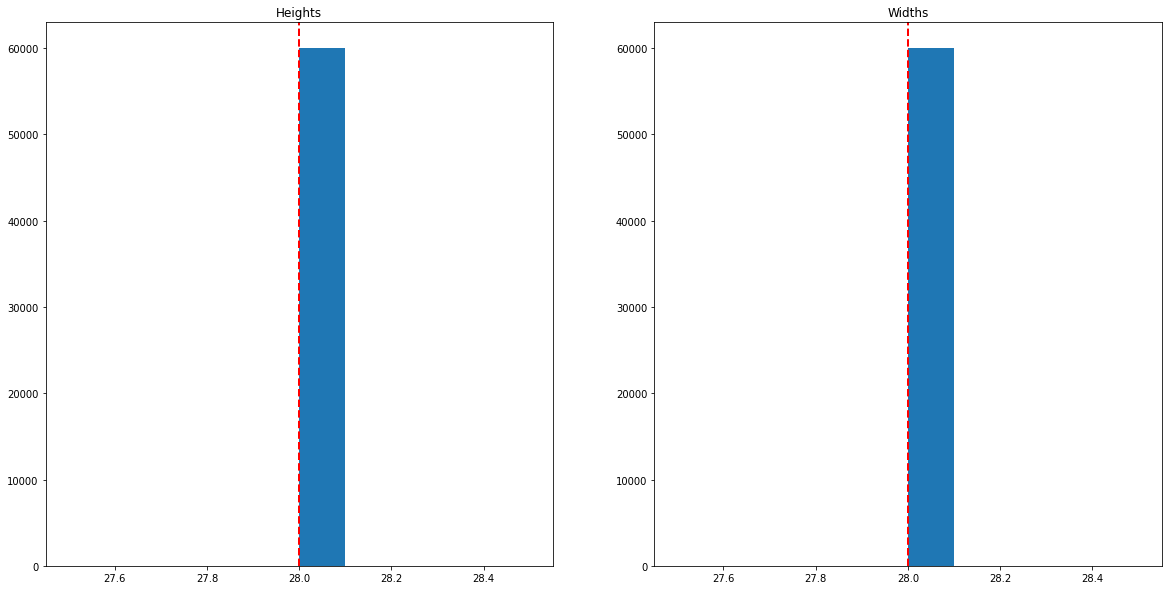

In [60]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.hist(heights)
plt.title('Heights')
# 평균값 넣기
plt.axvline(np.mean(heights), color='r', linestyle='dashed', linewidth=2) 
# vertical line(수직선)

plt.subplot(122)
plt.hist(widths)
plt.title('Widths')
# 평균값 넣기
plt.axvline(np.mean(widths), color='r', linestyle='dashed', linewidth=2)

plt.show()